In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/trab3/exams-tratados1.csv', escapechar='\\', encoding='utf-8')


In [5]:
df.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63


In [6]:
rep_df = df.replace(["associate's degree", "bachelor's degree", "master's degree"], ["associates degree", "bachelors degree", "masters degree"])
rep_df.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associates degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelors degree,standard,none,62,59,63


In [7]:
rep_df.shape

(1000, 8)

Transformando as variáveis categóricas nominais em variáveis categóricas ordinais

In [8]:
df2 = pd.DataFrame.copy(rep_df)

In [9]:
df2['gender'].replace({'male':0, 'female': 1}, inplace=True)
df2['race/ethnicity'].replace({'group A':0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4}, inplace=True)
df2['lunch'].replace({'standard':0, 'free/reduced': 1}, inplace=True)
df2['test preparation course'].replace({'completed':0, 'none': 1}, inplace=True)
df2['parental level of education'].replace({'some high school':0, 'high school': 1, 'some college': 2, 
                                           'bachelors degree': 3, 'associates degree': 4, 'masters degree': 5}, inplace=True)

In [10]:
df2.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,0,1,0,0,67,67,63
1,1,3,0,1,1,40,59,55
2,0,4,2,1,1,59,60,50
3,0,1,1,0,1,77,78,68
4,0,4,4,0,0,78,73,68
5,1,3,1,0,1,63,77,76
6,1,0,3,0,1,62,59,63
7,0,4,2,0,0,93,88,84
8,0,3,1,0,1,63,56,65
9,0,2,2,1,1,47,42,45


In [11]:
df2.dtypes

gender                         int64
race/ethnicity                 int64
parental level of education    int64
lunch                          int64
test preparation course        int64
math score                     int64
reading score                  int64
writing score                  int64
dtype: object

In [12]:
df2.shape

(1000, 8)

Legenda:

Gender: Gênero

Race/Ethnicity: Raça ou etnia

Parental Level of Education: Nível de escolaridade dos pais

Luch: Almoço (se era padrão ou de graça/reduzido)

Test Preparation Course: Curso preparatório para testes - sem é completo ou se não tem

Math Score: Pontuação em matemática

Reading Score: Pontuação em leitura

Writing Score: Pontuação em escrita

In [13]:
# Atributos previsores e Alvo
df2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,0,1,0,0,67,67,63
1,1,3,0,1,1,40,59,55
2,0,4,2,1,1,59,60,50
3,0,1,1,0,1,77,78,68
4,0,4,4,0,0,78,73,68


In [14]:
previsores = df2.iloc[:, 0:8].values

In [15]:
previsores

array([[ 0,  0,  1, ..., 67, 67, 63],
       [ 1,  3,  0, ..., 40, 59, 55],
       [ 0,  4,  2, ..., 59, 60, 50],
       ...,
       [ 1,  2,  0, ..., 32, 35, 41],
       [ 1,  2,  2, ..., 73, 74, 82],
       [ 0,  0,  2, ..., 65, 60, 62]])

In [16]:
previsores.shape

(1000, 8)

In [17]:
alvo = df2.iloc[:, 7].values

In [18]:
alvo

array([ 63,  55,  50,  68,  68,  76,  63,  84,  65,  45,  85,  90,  85,
        73,  85,  57,  42,  65,  44,  31,  88,  55,  73,  54,  32,  42,
        56,  60,  89,  51,  77,  73,  39,  71,  89,  74,  75,  54,  73,
        77,  72,  64,  82,  70,  87,  51,  57,  78,  73,  57,  64,  60,
        85,  49,  47,  62,  84,  83,  51,  48,  68,  59,  62,  78,  97,
        70,  56,  49,  60,  57,  73,  47,  63,  81,  67,  70,  59,  81,
        76,  45,  62,  42,  59,  73,  39,  69,  69,  88,  61,  72,  42,
        70,  87,  93,  72,  67, 100,  49,  49,  53,  62,  79,  77,  67,
        58,  82,  73,  44,  71,  33,  86,  47,  71,  33,  74,  76,  63,
        55,  58,  87,  71,  89,  62,  45,  86,  58,  64,  45,  87, 100,
        82,  64,  57,  56,  54,  69,  76,  68,  49,  64,  57,  83,  87,
        60,  68,  57,  66,  46, 100,  44,  80,  59,  76,  73,  58,  47,
        59,  87,  93,  79,  97,  65,  91,  75,  70,  92,  58,  68,  93,
        83,  59,  76,  71,  62,  72,  60,  56,  51,  95,  86,  6

In [19]:
alvo.shape

(1000,)

In [20]:
# Análise das escalas dos atributos (Escalonamento)
df2.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.483000,2.161000,2.144000,0.348000,0.665000,66.396000,69.002000,67.738000
std,0.499961,1.132414,1.581697,0.476574,0.472227,15.402871,14.737272,15.600985
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,27.000000,23.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,56.000000,60.000000,58.000000
50%,0.000000,2.000000,2.000000,0.000000,1.000000,66.500000,70.000000,68.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.000000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.000000,100.000000,100.000000


In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [23]:
previsores_esc

array([[-0.96655883, -1.90926764, -0.72363566, ...,  0.03923309,
        -0.13591401, -0.30385073],
       [ 1.03459817,  0.74126587, -1.35618431, ..., -1.714564  ,
        -0.67902695, -0.81689543],
       [-0.96655883,  1.62477704, -0.09108701, ..., -0.48041049,
        -0.61113783, -1.13754838],
       ...,
       [ 1.03459817, -0.1422453 , -1.35618431, ..., -2.23420758,
        -2.30836575, -1.71472367],
       [ 1.03459817, -0.1422453 , -0.09108701, ...,  0.42896578,
         0.33930981,  0.91463045],
       [-0.96655883, -1.90926764, -0.09108701, ..., -0.0906778 ,
        -0.61113783, -0.36798132]])

In [24]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7
0,-0.966559,-1.909268,-0.723636,-0.730577,-1.408927,0.039233,-0.135914,-0.303851
1,1.034598,0.741266,-1.356184,1.368782,0.709760,-1.714564,-0.679027,-0.816895
2,-0.966559,1.624777,-0.091087,1.368782,0.709760,-0.480410,-0.611138,-1.137548
3,-0.966559,-1.025756,-0.723636,-0.730577,0.709760,0.688788,0.610866,0.016802
4,-0.966559,1.624777,1.174010,-0.730577,-1.408927,0.753743,0.271421,0.016802
...,...,...,...,...,...,...,...,...
995,-0.966559,-0.142245,-0.723636,-0.730577,0.709760,0.428966,0.067753,-0.175590
996,-0.966559,0.741266,1.174010,1.368782,-1.408927,1.208431,1.493425,1.555936
997,1.034598,-0.142245,-1.356184,1.368782,0.709760,-2.234208,-2.308366,-1.714724
998,1.034598,-0.142245,-0.091087,-0.730577,0.709760,0.428966,0.339310,0.914630


RESUMO PRÉ-PROCESSAMENTO

alvo = variável que se pretende atingir.

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

BASE DE TREINO E TESTE

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [27]:
x_treino.shape

(700, 8)

In [28]:
x_teste.shape

(300, 8)

In [29]:
y_treino.shape

(700,)

In [30]:
y_teste.shape

(300,)

ÁRVORE DE DECISÃO

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [32]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
#arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.5, 0.875, 'X[7] <= -0.015\nentropy = 5.888\nsamples = 700\nvalue = [2, 1, 1, 1, 1, 2, 3, 3, 4, 2, 1, 2, 3, 4\n6, 9, 8, 7, 7, 5, 10, 9, 8, 6, 9, 5, 14, 13\n4, 14, 8, 17, 14, 17, 11, 17, 18, 28, 19, 21\n14, 18, 10, 19, 24, 17, 17, 14, 14, 16, 10, 13\n10, 11, 11, 11, 13, 12, 9, 13, 12, 6, 10, 9, 2\n5, 8, 4, 7, 2, 7, 1, 2, 15]'),
 Text(0.25, 0.625, 'X[7] <= -0.657\nentropy = 4.934\nsamples = 348\nvalue = [2, 1, 1, 1, 1, 2, 3, 3, 4, 2, 1, 2, 3, 4\n6, 9, 8, 7, 7, 5, 10, 9, 8, 6, 9, 5, 14, 13\n4, 14, 8, 17, 14, 17, 11, 17, 18, 28, 19, 21\n14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0]'),
 Text(0.125, 0.375, 'X[7] <= -1.298\nentropy = 4.605\nsamples = 172\nvalue = [2, 1, 1, 1, 1, 2, 3, 3, 4, 2, 1, 2, 3, 4\n6, 9, 8, 7, 7, 5, 10, 9, 8, 6, 9, 5, 14, 13\n4, 14, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0]'),
 Text(0.0625, 0.125, 'entropy = 4.035\nsa

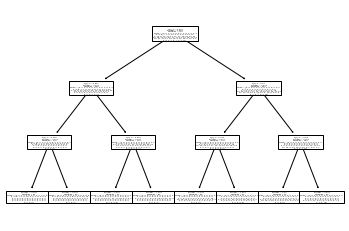

In [33]:
tree.plot_tree(_arvore)

In [34]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([ 63,  83,  53,  64,  47,  47,  63,  71,  63, 100,  47,  83, 100,
        73,  71,  63,  83,  63,  83,  83,  73,  83,  71,  53,  83,  63,
        53,  64,  64,  53,  64,  63,  64,  83,  47, 100,  53,  63,  64,
        73,  73, 100, 100,  73,  71,  63,  71,  83,  64, 100,  83,  83,
        53,  71,  83,  73,  64,  71,  73,  83,  64,  63, 100,  71,  63,
        53, 100,  73,  63,  53,  71,  47,  53,  63,  71,  63,  73, 100,
        73,  53,  53, 100,  53,  71,  71,  53,  64, 100,  64,  64, 100,
        63,  63,  64,  83, 100,  47,  71,  64,  53,  53,  63,  71,  73,
        83,  53, 100,  63,  63,  73,  53,  83,  83,  73,  63, 100,  73,
        73,  73, 100, 100,  71,  63,  73,  71,  73,  73,  47,  53,  53,
        63,  73, 100,  63,  53,  83,  47,  64,  71,  53,  83,  53,  83,
        83,  47,  47,  83,  83,  47, 100,  71,  73,  64,  63,  71,  53,
        83,  64, 100,  83,  83,  73,  71,  73,  64, 100,  53,  83,  47,
        63,  53,  47,  53, 100,  53, 100,  83, 100,  63,  71,  8

In [35]:
y_teste

array([ 58,  79,  50,  66,  45,  44,  60,  70,  63, 100,  28,  81,  87,
        75,  71,  62,  79,  60,  85,  81,  73,  83,  70,  53,  80,  60,
        51,  67,  66,  55,  65,  59,  64,  83,  43,  87,  54,  60,  67,
        77,  78,  92,  92,  75,  70,  63,  70,  83,  64,  89,  81,  86,
        50,  72,  82,  75,  65,  71,  74,  79,  66,  63,  87,  70,  61,
        48,  88,  73,  61,  52,  69,  39,  51,  61,  69,  61,  78,  89,
        76,  56,  50,  89,  50,  72,  69,  53,  64,  92,  66,  65,  88,
        60,  61,  66,  80,  96,  27,  71,  64,  49,  57,  60,  70,  73,
        81,  56,  89,  62,  59,  77,  49,  79,  82,  78,  59,  87,  76,
        76,  75,  89, 100,  71,  62,  73,  68,  74,  73,  39,  57,  50,
        60,  73,  90,  58,  54,  80,  43,  65,  71,  57,  79,  48,  82,
        80,  47,  30,  79,  83,  47,  89,  72,  77,  66,  60,  70,  53,
        82,  66,  90,  82,  82,  77,  71,  77,  65,  90,  49,  83,  47,
        59,  55,  44,  57,  99,  49,  93,  82,  91,  61,  68,  8

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 16.67%


In [38]:
confusion_matrix(y_teste, previsoes_arvore)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 3]])

In [39]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         3
          44       0.00      0.00      0.00         4
          45       0.00      0.00      0.00         3
          47       0.12      1.00      0.21         3
          48       0.00      0.00      0.00         6
          49       0.00      0.00      0.00         7
          50       0.00    

In [41]:
# Análise de dados de treino
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([ 83,  63,  47,  71,  64,  71,  73,  73,  64,  53,  47,  64,  71,
       100,  73,  47,  63,  83,  47,  53,  83,  63,  83,  63,  71,  63,
        73,  71,  63,  83,  63, 100, 100,  53,  83,  63,  83,  71,  71,
        63,  63,  63,  63,  83, 100,  53,  47,  53, 100,  71,  83,  73,
        71,  83,  83,  73,  64,  47,  53,  64,  73,  64,  64,  73,  63,
        83,  71,  53,  83,  63,  64,  63,  63,  64,  53,  47,  71,  47,
       100,  73,  83, 100,  71,  71,  47,  71, 100,  64,  53,  53,  63,
        71,  63, 100,  73,  47,  83,  83,  63,  64,  83,  47,  71, 100,
        63,  71, 100,  53, 100,  83, 100,  64,  63,  64,  47,  83,  73,
       100,  64,  64,  53,  53,  83,  64,  47,  73,  47,  47,  63,  53,
        83,  63,  53,  47,  83, 100,  63,  64,  63,  53,  63, 100, 100,
        64,  63,  64,  47,  83,  47,  83,  71,  63,  83,  83,  83,  53,
        64,  73,  73,  47,  47,  53,  73,  71,  83,  63,  83,  73,  83,
       100, 100,  83,  63,  64,  53,  47,  83,  53,  63,  47,  7

In [42]:
accuracy_score(y_treino, previsoes_treino)

0.19857142857142857

In [43]:
confusion_matrix(y_treino, previsoes_treino)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  2],
       [ 0,  0,  0, ...,  0,  0, 15]])